# Line Chart

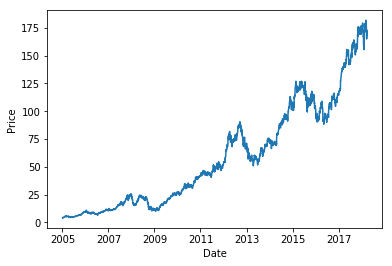

In [26]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader
import matplotlib.pyplot as plt
import math
import numpy as np

import quandl
quandl.ApiConfig.api_key = 'iySJadzpPxtynZzTVVzu'
data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2005-01-01', 'lte': '2018-10-01' }, 
                        paginate=True)


plt.plot((data['date']),(data['adj_close']))
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()


# CandleStick
https://www.investopedia.com/trading/candlestick-charting-what-is-it/

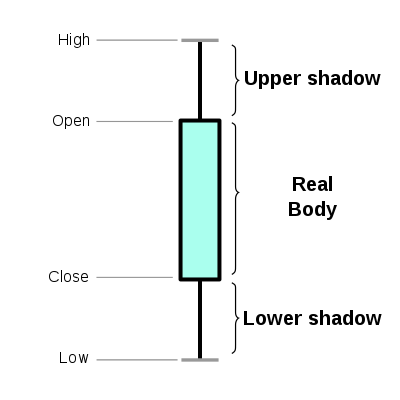

# Tells you that open, close, high, low is useful as needed by candle stick to see overall trend of stock price

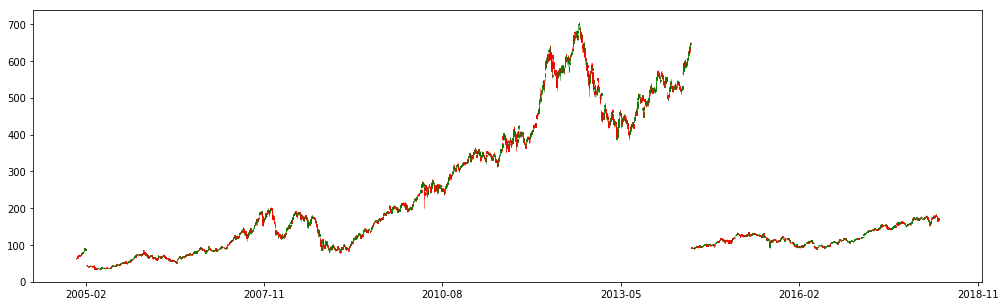

In [37]:
import pandas as pd
# import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
# from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL'],date = { 'gte': '2005-01-01', 'lte': '2018-12-01' }, paginate=True)
# print(data)

data['date'] = pd.to_datetime(data['date'])
data["date"] = data["date"].apply(mdates.date2num)

ohlc= data[['date', 'open', 'high', 'low','close']].copy()
f1, ax = plt.subplots(figsize = (17,5))
candlestick_ohlc(ax, ohlc.values, width=2.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

# Histogram

From the QQ plot, the differences in closing price does not seem to follow a normal distribution

Histogram


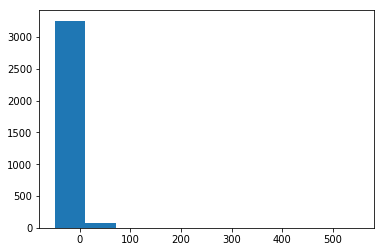

QQ Plot


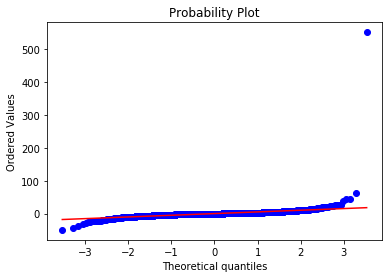

r value is 0.4720242035197378


In [56]:
import scipy.stats as stats
import pylab
closing_price= data[['close']].copy()
previous_value=np.zeros((1,))
differences=[]

print("Histogram")

for index, value in closing_price.iterrows():
    if(previous_value!=0):
        differences.append(round((value.values-previous_value).item(0),2))
    previous_value=value.values
# print(differences)
min_diff=min(differences)
# print(min_diff)
max_diff=max(differences)
# print(max_diff)
plt.hist(x=differences)
plt.show()


print("QQ Plot") 
result1,result2=stats.probplot(differences, dist="norm", plot=pylab)

pylab.show()
print("r value is "+ str(result2[2]))
